# Curve fitting
The current equation for the MOSFET in a sturation mode is: (The channel modulation effect could be ignored for the first order approximatoin)
$I_{ds}=\frac{1}{2}C_{ox}\mu_{n}\frac{W}{L}(V_{gs}-V_T)^2\:(1+\lambda Vds) ≃ \frac{1}{2}C_{ox}\mu_{n}\frac{W}{L}(V_{gs}-V_T)^2$

The equation could be written as:
$I_{ds}=K(V_{gs}-V_T)^2$ where $K=\frac{1}{2}C_{ox}\mu_{n}\frac{W}{L}$.
The sqr function in code is in this form and objetive is to find value of K and $V_T$ that fit the experimental data.


Vt= 1.015610968203265
k= 0.0003109277458801083


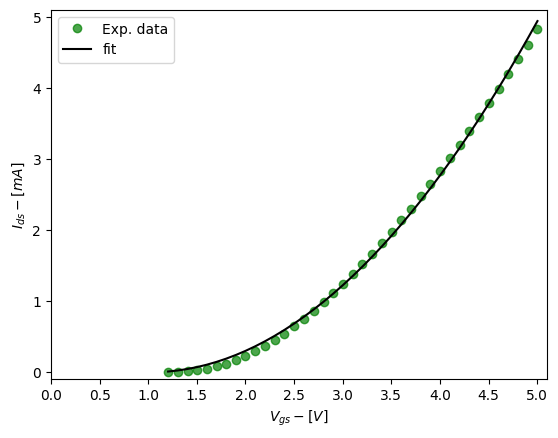

In [31]:
# Modules you need
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# The Vgs-Ids equation
def sqr(x,k,vt):
    return (k*(x-vt)**2)

# Experimental data excluding the leading zeros.
vgs=np.asarray([1.204290092,1.302828848,1.404929161,1.502372026,1.602188706,1.703284562,1.80081892,1.903832376,1.998809338,2.101365983,2.201640427,2.300361216,2.40127486,2.502278864,2.602826953,2.703465641,2.80419594,2.903191328,3.00227803,3.101455688,3.20337379,3.302095115,3.400542319,3.502003074,3.601547062,3.700906634,3.801911175,3.901271999,4.005199611,4.102002144,4.201179564,4.301636875,4.401910365,4.502457917,4.60373646,4.699899971,4.803279936,4.901817799,5.002365768])
Ids=1e-3*np.asarray([0.001958318,0.004730615,0.012066645,0.028700426,0.050063122,0.08316721,0.120181121,0.170080766,0.226665944,0.295643002,0.372448236,0.456265956,0.545464754,0.649173856,0.756314337,0.868178546,0.98998934,1.11588192,1.241279006,1.378744364,1.521103859,1.669169784,1.820009589,1.975247979,2.138481379,2.303508043,2.479949236,2.645953178,2.836088896,3.015135288,3.201200962,3.395088196,3.586856842,3.790206909,3.989311695,4.19053793,4.405297756,4.611091137,4.828624725])
# 1e-3 at the begining is conversion form mA to A.

# Fitting function
parameters, covariance = curve_fit(sqr, vgs, Ids)
fit_k,fit_vt  = parameters[0],parameters[1]

print("Vt=",fit_vt)
print("k=",fit_k)

# Ploting the fit and Exp. Data (only the acceptable range of function)
fit_y = sqr(vgs, fit_k, fit_vt)
plt.plot(vgs, Ids, 'og', label='Exp. data',alpha=0.7)
plt.plot(vgs, fit_y, '-k', label='fit')

# This range is based on my experiment your value could be slightly different.
plt.xlim(0,5.1)
plt.xticks(np.arange(0,5.5,0.5))
plt.ylim(-0.1e-3,5.1e-3)
plt.yticks(1e-3*np.arange(0,5.5,1),['0','1','2','3','4','5'])

plt.xlabel("$V_{gs} - [V]$")
plt.ylabel("$I_{ds} - [mA]$")

plt.legend()
plt.show()